# Predicting credit card customer churn - Modeling

In [2]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/BankChurners_preprocessed.csv')

# increase limit to show all columns in dataframe
pd.set_option('display.max_columns', 500)
df.head()

,Customer_ID,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer
0,768805383,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.248062,0.437534,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,818770008,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.178295,1.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,713982108,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.077519,0.628164,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,769911858,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.077519,0.628164,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,709106358,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.139535,0.673129,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Customer_ID', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver',
       'Attrition_Flag_Attrited Customer'],
      dtype='object')

Ignoring the customer ID and the attritted flag columns, we have 29 feature columns. As the values have been scaled previously in [the preprocessing step](https://github.com/elpea74/CapstoneTwo/blob/main/Capstone%202%20-%20Preprocessing.ipynb), their values now all range from 0 to 1. We will now create a new dataset only containing feature columns.

In [5]:
feature_cols = ['Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']
df_feature = df[feature_cols]
df_feature.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.248062,0.437534,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.178295,1.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.077519,0.628164,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.077519,0.628164,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.139535,0.673129,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [6]:
X = df_feature
y = df['Attrition_Flag_Attrited Customer']

SMOTE was also determined previously to help increase the recall score of a Random Forest model. Therefore, we'll use SMOTE to oversample the minority class (i.e. Attritted customers)

In [7]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10120, 29)
Shape of X after SMOTE: (16988, 29)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition_Flag_Attrited Customer, dtype: float64

## Applying machine learning models

As this is a classification problem aiming to predict which customers churn their credit cards, we will use the following ML models:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Support vector machine (SVM)
- Random Forest
- Gradient Boost

We will split the dataset into a training and a testing set.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [57]:
# importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### Logistic Regression

In [10]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.784318
1,0.010,0.830704
2,0.100,0.849305
3,1.000,0.853308
4,10.000,0.854015
5,100.000,0.854486


Accuracy = 0.8545
Recall = 0.8538



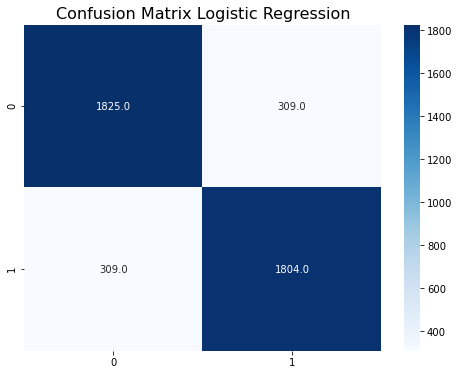

In [11]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_lr):.4f}\nRecall = {recall_score(y_test, y_pred_lr):.4f}\n')
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix Logistic Regression', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

In [12]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.9228495  0.93435979 0.91397241 0.92717849 0.93786142]
Mean cross validation test score: 0.9272443208337382
Mean cross validation train score: 0.9258436038310338
Standard deviation in cv test scores: 0.008471305329575492


### K-Nearest Neighbors

Accuracy = 0.8437
Recall = 0.9678



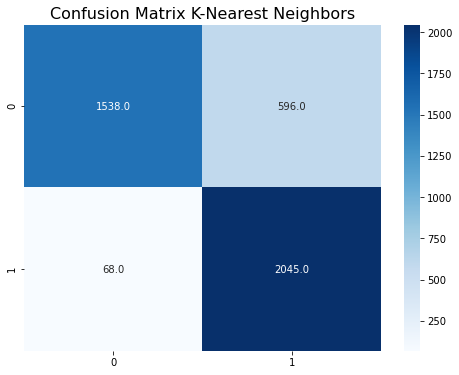

In [13]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Fit model to training data
knn.fit(X_train, y_train)

# Predict using model: 
y_pred_knn = knn.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_knn):.4f}\nRecall = {recall_score(y_test, y_pred_knn):.4f}\n')
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix K-Nearest Neighbors', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

In [14]:
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_test_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_knn))

[0.85424175 0.89525581 0.88307306 0.85378814 0.8876128 ]
Mean cross validation test score: 0.8747943130700809
Mean cross validation train score: 0.942982745871873
Standard deviation in cv test scores: 0.01740799307206381


### Support vector machine

Accuracy = 0.9009
Recall = 0.9101



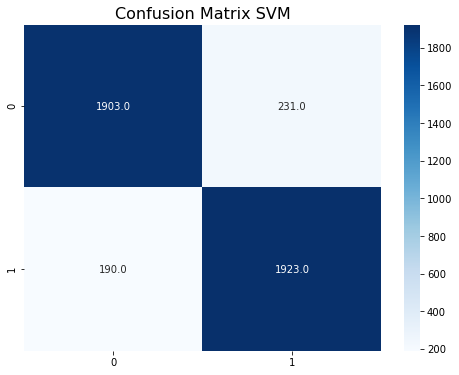

In [15]:
svm = SVC()

# Fit model to training data
svm.fit(X_train, y_train)

# Predict using model: 
y_pred_svm = svm.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_svm):.4f}\nRecall = {recall_score(y_test, y_pred_svm):.4f}\n')
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix SVM', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');


In [16]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_test_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_svm))

[0.93936475 0.95291799 0.93112021 0.94740113 0.95387749]
Mean cross validation test score: 0.9449363139627499
Mean cross validation train score: 0.9525898548606463
Standard deviation in cv test scores: 0.008621532088977807


### Random Forest

Accuracy = 0.9602
Recall = 0.9546



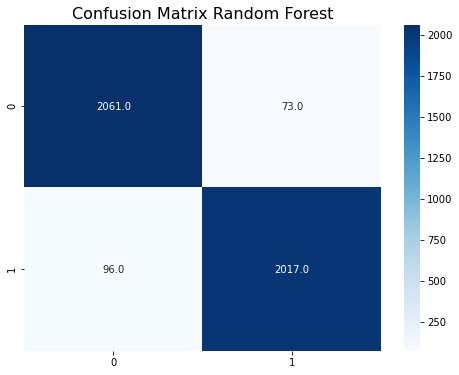

In [17]:
rf = RandomForestClassifier(random_state=42)

# Fit model to training data
rf.fit(X_train, y_train)

# Predict using model: 
y_pred_rf = rf.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_rf):.4f}\nRecall = {recall_score(y_test, y_pred_rf):.4f}\n')
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix Random Forest', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');


In [18]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_test_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.98418235 0.98760388 0.98323233 0.98895357 0.98854845]
Mean cross validation test score: 0.9865041170649306
Mean cross validation train score: 0.9914975686948935
Standard deviation in cv test scores: 0.002344516682821443


### Gradient Boost

Accuracy = 0.9569
Recall = 0.9484



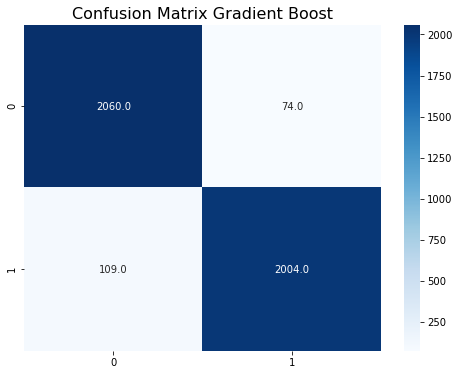

In [19]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

# Fit model to training data
gb.fit(X_train, y_train)

# Predict using model: 
y_pred_gb = gb.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_gb):.4f}\nRecall = {recall_score(y_test, y_pred_gb):.4f}\n')
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix Gradient Boost', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

In [20]:
cv_scores_test= cross_val_score(gb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gb_test= cv_scores_test.mean()
cv_scores_gb_train= cv_scores_train.mean()
cv_scores_std_test_gb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gb_test))
print ('Mean cross validation train score: ' +str(cv_scores_gb_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gb))

[0.98528964 0.98403286 0.9837734  0.99321842 0.98593183]
Mean cross validation test score: 0.9864492316027846
Mean cross validation train score: 0.9864492316027846
Standard deviation in cv test scores: 0.003476583150593824


## Model comparison

We applied different ML models and evaluate them using ROC-AUC scores. We will now compare the cross validation test score of all models to see which one is the most accurate.

In [21]:
cv_scores_test = pd.to_numeric([cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gb_test], downcast='float')
cv_scores_train = pd.to_numeric([cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gb_train], downcast='float')
accuracy_scores = pd.to_numeric([accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_gb)], downcast='float')
cols = ['Model', 'CV test score', 'CV train score', 'Accuracy']
indexes = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Gradient Boost']

df_scores = pd.DataFrame(np.array([indexes, cv_scores_test, cv_scores_train, accuracy_scores])).T

df_scores.columns = cols
#df_scores.set_index('Model', inplace=True)

df_scores

,Model,CV test score,CV train score,Accuracy
0,Logistic Regression,0.9272443,0.9258436,0.8544855
1,K-Nearest Neighbors,0.8747943,0.94298273,0.84365433
2,Support Vector Machine,0.94493634,0.95258987,0.9008712
3,Random Forest,0.98650414,0.9914976,0.9602072
4,Gradient Boost,0.98644924,0.9885216,0.9569108


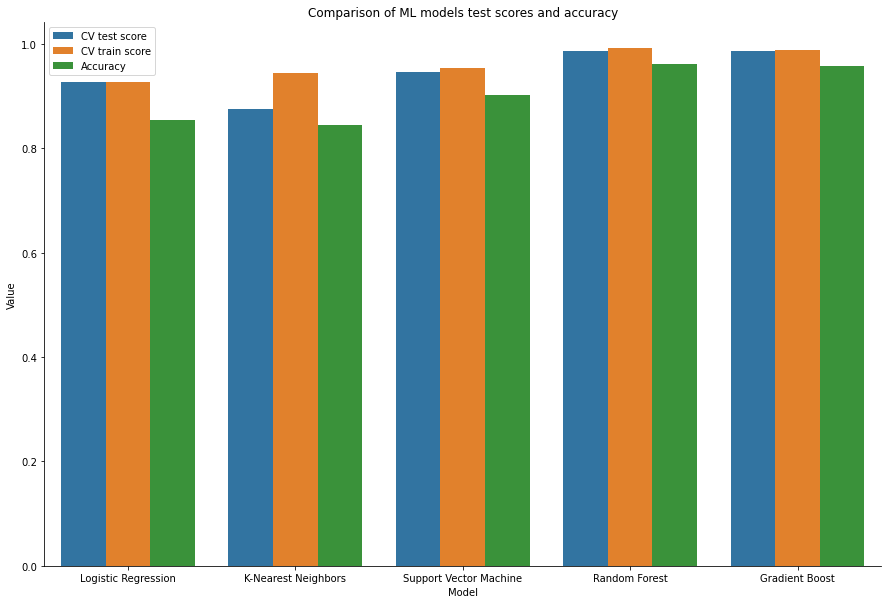

In [22]:
df_scores.explode('CV test score')
df_scores['CV test score'] = df_scores['CV test score'].astype('float')

df_scores.explode('CV train score')
df_scores['CV train score'] = df_scores['CV train score'].astype('float')

df_scores.explode('Accuracy')
df_scores['Accuracy'] = df_scores['Accuracy'].astype('float')

fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = df_scores.melt(id_vars='Model').rename(columns=str.title)
tidy
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.title('Comparison of ML models test scores and accuracy')
plt.xlabel('Model')
plt.legend(loc='best')
sns.despine(fig)

From the barplot, we can see that Random Forest and Gradient Boost are the best models to use for our credit card churn predictions.

## Hyperparameter Tuning for Random Forest

In [23]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=5)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num=5)]

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# mehtod of selecting samples for training each tree
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 32, 55, 77, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


##### Random search training

In [24]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [25]:
# view the best parameters from fitting the random search
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=32, max_features='sqrt',
                       n_estimators=1000, random_state=42)

In [26]:
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_rf = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_rf)
best_random = rf_random.best_estimator_
y_pred_rf_random = rf_random.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_rf_random)

print('Using best hyperparameters resulted in an accuracy improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Using best hyperparameters resulted in an accuracy improvement of 0.42%.


##### Now we will fit this random model with the optimal hyperparameters to our dataset.

In [55]:
rf = RandomForestClassifier(bootstrap=False, max_depth=32, max_features='sqrt',
                       n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(recall)
print(cv)

0.9642100306098422
0.9611926171320397
0.9892095367152052


                          Features  Importance scores
0                  Dependent_count           0.000062
1                   Months_on_book           0.000578
2         Total_Relationship_Count           0.001712
3           Months_Inactive_12_mon           0.001828
4            Contacts_Count_12_mon           0.002001
5                     Credit_Limit           0.002155
6              Total_Revolving_Bal           0.002478
7                  Avg_Open_To_Buy           0.003091
8             Total_Amt_Chng_Q4_Q1           0.003147
9                   Total_Trans_Ct           0.003235
10             Total_Ct_Chng_Q4_Q1           0.003260
11                        Gender_M           0.003414
12       Education_Level_Doctorate           0.003558
13        Education_Level_Graduate           0.004009
14     Education_Level_High School           0.004137
15   Education_Level_Post-Graduate           0.004678
16      Education_Level_Uneducated           0.005715
17         Education_Level_U

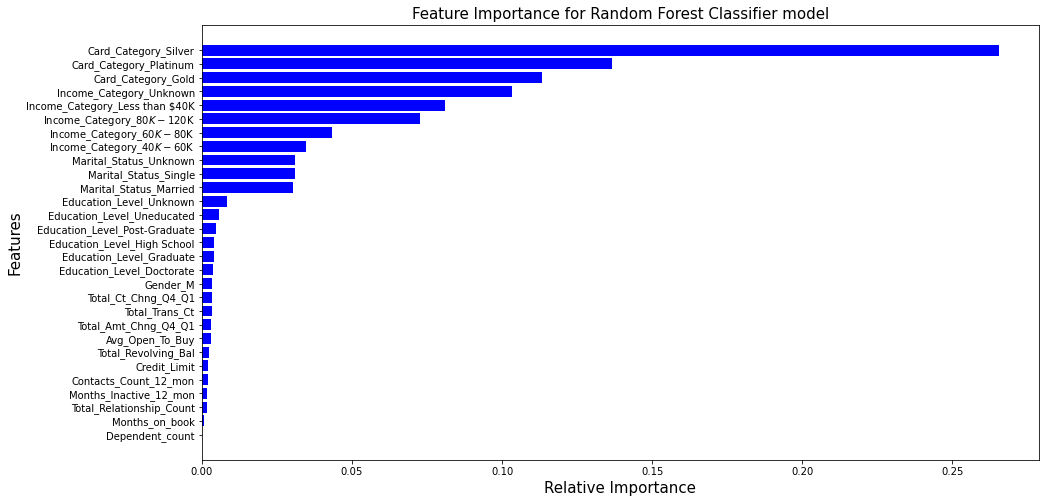

In [31]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(15,8))
#indices = np.argsort(importances)
index = range(29)
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importance for Random Forest Classifier model',fontsize=15)
plt.savefig("Feature_Importance_RF.png")
plt.show()
#len(importances)

##### ROC-AUC Score and the ROC curve:

In [32]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9951087146956118


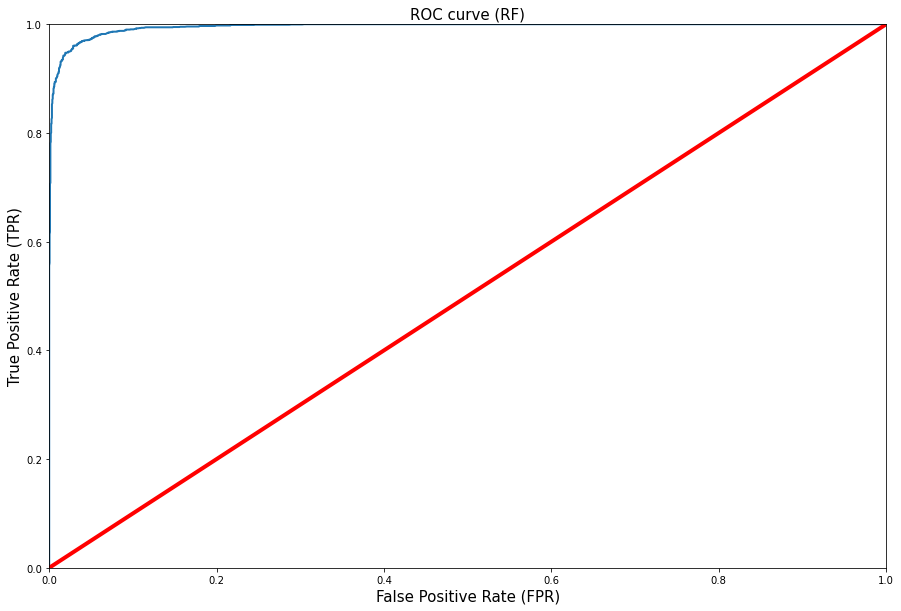

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(15, 10))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("ROC curve RF.png")
plt.show()

## Hyperparameter Tuning for Gradient boost 

In [36]:
gb =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=300, num=3)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [4, 8]

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

learning_rate = [0.1, 0.5, 1.0]


gb_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'learning_rate': learning_rate}
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = gb_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                        random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5, 1.0],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [37]:
# view the best parameters from fitting the random search
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 8,
 'learning_rate': 0.1}

In [39]:
base_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
base_model.fit(X_train, y_train)
y_pred_gb = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_gb)
best_random = gb_random.best_estimator_
y_pred_gb_random = gb_random.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_gb_random)

print('Using best hyperparameters resulted in an accuracy improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Using best hyperparameters resulted in an accuracy improvement of 0.89%.


##### Now we will fit this random model with the optimal hyperparameters to our dataset.

In [56]:
gb = GradientBoostingClassifier(n_estimators=200,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             max_depth=8,
                             learning_rate=0.1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc = accuracy_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(recall)
print(cv)

0.9653873322345184
0.9574065309985802
0.9892095367152052


                          Features  Importance scores
0                  Dependent_count           0.000147
1                   Months_on_book           0.000422
2         Total_Relationship_Count           0.000882
3           Months_Inactive_12_mon           0.001027
4            Contacts_Count_12_mon           0.001039
5                     Credit_Limit           0.001101
6              Total_Revolving_Bal           0.001104
7                  Avg_Open_To_Buy           0.001196
8             Total_Amt_Chng_Q4_Q1           0.001370
9                   Total_Trans_Ct           0.001449
10             Total_Ct_Chng_Q4_Q1           0.001523
11                        Gender_M           0.001839
12       Education_Level_Doctorate           0.001970
13        Education_Level_Graduate           0.002060
14     Education_Level_High School           0.002103
15   Education_Level_Post-Graduate           0.002594
16      Education_Level_Uneducated           0.004431
17         Education_Level_U

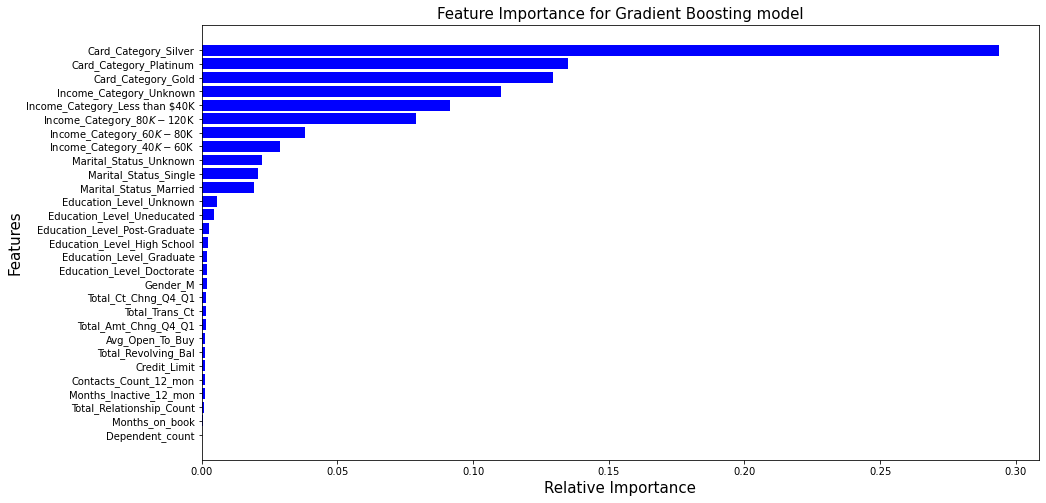

In [46]:
#Feature importances:

features = X
importances = list(gb.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(15,8))
#indices = np.argsort(importances)
index = range(29)
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importance for Gradient Boosting model',fontsize=15)
plt.savefig("Feature_Importance_GB.png")
plt.show()

##### ROC-AUC Score and the ROC curve:

In [67]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = gb.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.9954275114866642


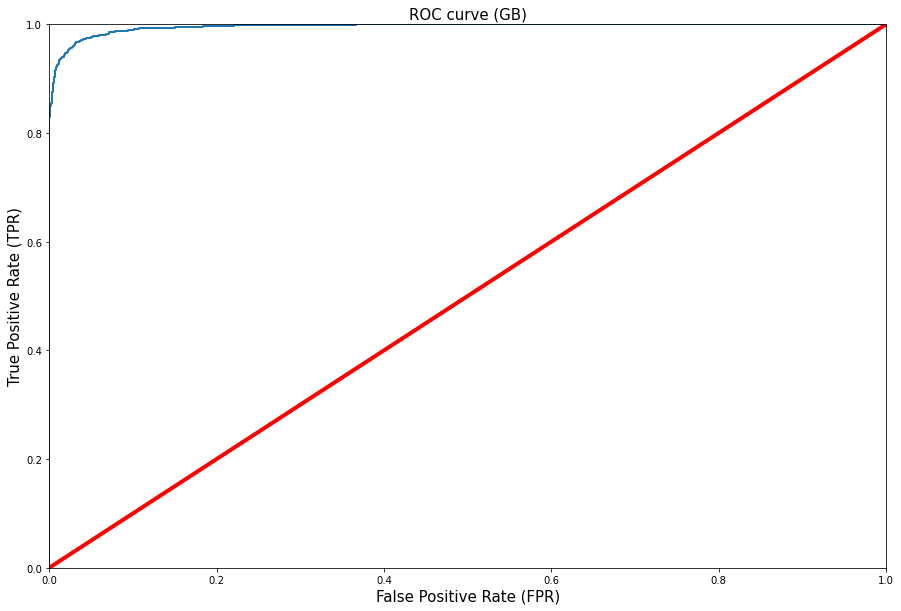

In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(15, 10))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("ROC curve GB.png")
plt.show()

## Conclusion

- In order to predict the credit card churning rate, here we have considered a bunch of 29 features engineered from the original dataset. From the feature importance graphs, we can see that a bank customer possessing a silver credit card is an overly important feature to predict whether he/she churns on the credit card or not.

- This is a classification problem. Here we have used the following classification models:

Logistic Regression
K-Nearest Neighbor (KNN)
Support vector machine (SVM)
Random Forest
Gradient Boost

- We have evaluated each models in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and plotted them. The two best performing models are Random Forest and Gradient Boosting. Both are ensemble models, based on decision trees.

- Using optimal parameters for our Random Forest and Gradient Boosting models, we can see that Gradient Boosting is a little bit more accurate than Random Forest (GB 96.6% vs RF 96.4%), but the recall score of Random Forest is higher than Gradient Boosting (recall GB 95.7% vs. RF 96.1%). Since we need to focus on keeping the number of false negative (i.e. the number of people predicted as "not churn" but in fact churn on their credit cards) as low as possible, we will select the Random Forest model in this case for future predictions.